## Questão 1

Utilize redes neurais perceptron de múltiplas camadas para aproximar as funções abaixo. Apresente um gráfico com a curva da função analítica e a curva da função aproximada 
pela rede neural. Apresente também a curva do erro médio de treinamento com relação ao 
número de épocas e a curva do erro médio com o conjunto de validação. Procure definir 
para cada função a arquitetura da rede neural perceptron, isto é, o número de entradas, o 
número de neurônios em cada camada e o número de neurônios camada de saída.
Observações. Como se trata de um problema de aproximação de funções, considere a camada de saída do tipo linear puro. Isto é, φ(v)=v, onde v é o potencial de ativação.

a) f (x1,x2) = (1 -x1)^2 + (1 -x2)^2 + 100 (x2 - x1^2)^2  ; -10 ≤x1≤10, -10≤ x2 ≤10

b) f (x1,x2) = f(x1,x2)=(sen(πx1)/πx1)(sen(πx2)/πx2) ; -4π<=x1<=4π -4π<=x2<=4π


#**1 A)**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from numpy.linalg import norm
from itertools import product

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dense, Reshape, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
import tensorflow as tf

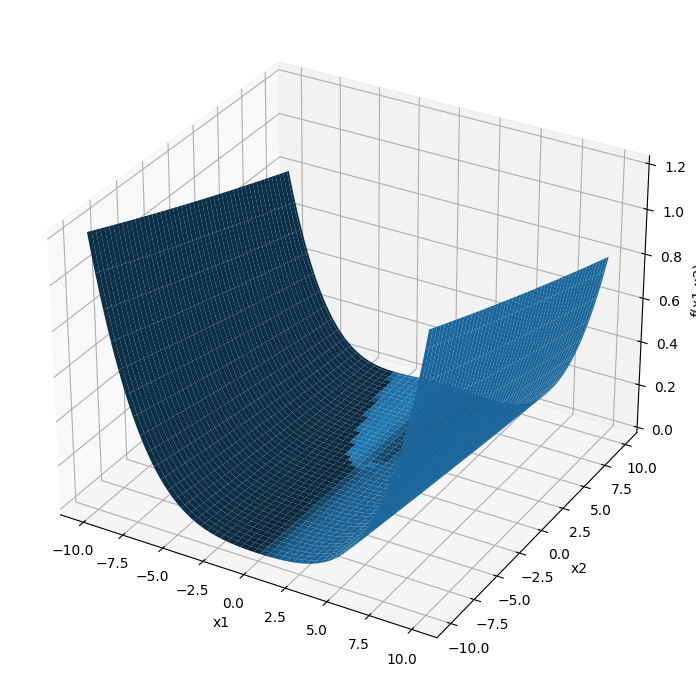

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

x1, x2 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
z =  (1 - x1**2) + 100*((x2- (x1**2))**2)

ax.plot_surface(x1, x2, z)

ax.set(
    xlabel='x1',
    ylabel='x2',
    zlabel='f(x1,x2)'
    )

plt.tight_layout()
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    np.vstack([x1.flatten(), x2.flatten()]).T, 
    z.flatten(), 
    test_size=0.2, 
    random_state=505
)

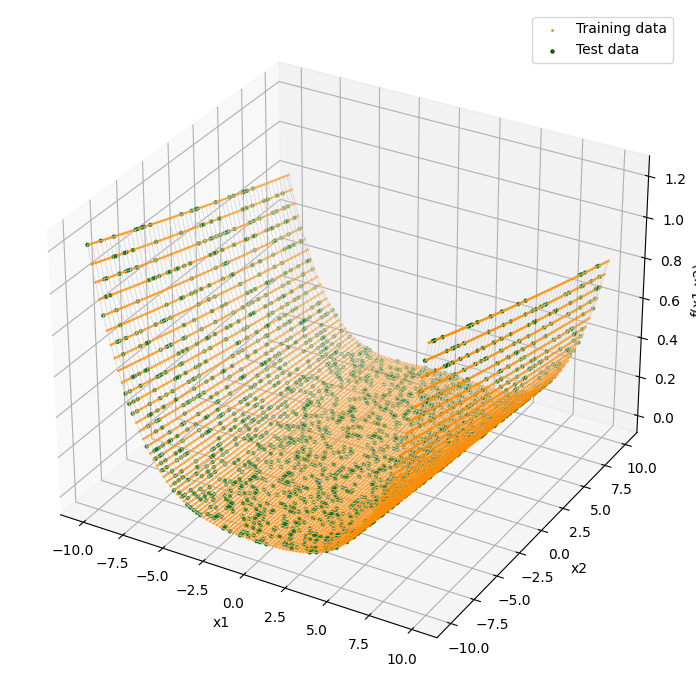

In [ ]:

fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, z, linewidths=0.5, color='lightgrey')
ax.scatter(x_train[:,0], x_train[:,1], y_train, s=1, color='darkorange', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=5, color='darkgreen', label='Test data')

ax.set(
    xlabel='x1',
    ylabel='x2',
    zlabel='f(x1,x2)'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

mlp.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

mlp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                192       
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 dense_18 (Dense)            (None, 4)                 36        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 2,977
Trainable params: 2,977
Non-traina

In [ ]:
history = mlp.fit(
    x_train, y_train,
    batch_size=8,
    epochs=2000,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/2000
900/900 [==============================] - 5s 2ms/step - loss: 82814099456.0000 - val_loss: 35815194624.0000 - lr: 0.0010
Epoch 2/2000
900/900 [==============================] - 2s 2ms/step - loss: 34349918208.0000 - val_loss: 30003689472.0000 - lr: 0.0010
Epoch 3/2000
900/900 [==============================] - 2s 2ms/step - loss: 29311518720.0000 - val_loss: 25646080000.0000 - lr: 0.0010
Epoch 4/2000
900/900 [==============================] - 2s 2ms/step - loss: 24041668608.0000 - val_loss: 21279635456.0000 - lr: 0.0010
Epoch 5/2000
900/900 [==============================] - 2s 2ms/step - loss: 19129862144.0000 - val_loss: 17811460096.0000 - lr: 0.0010
Epoch 6/2000
900/900 [==============================] - 3s 3ms/step - loss: 15283789824.0000 - val_loss: 14908835840.0000 - lr: 0.0010
Epoch 7/2000
900/900 [==============================] - 2s 2ms/step - loss: 12091311104.0000 - val_loss: 11660435456.0000 - lr: 0.0010
Epoch 8/2000
900/900 [==============================] -

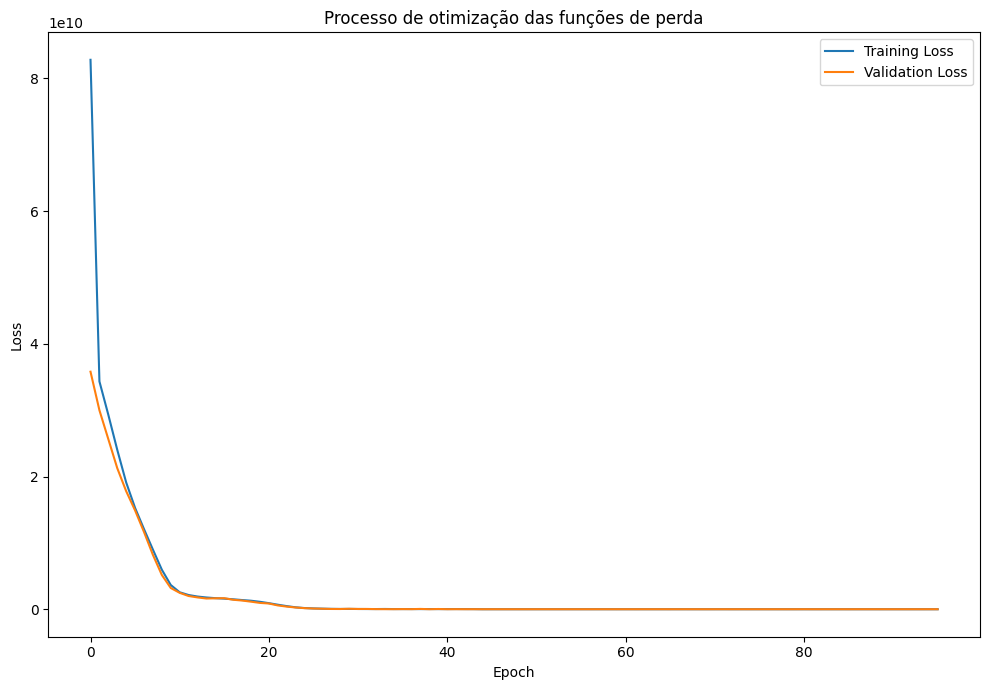

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')

ax.set(
    title='Processo de otimização das funções de perda',
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

63/63 [==============================] - 0s 1ms/step


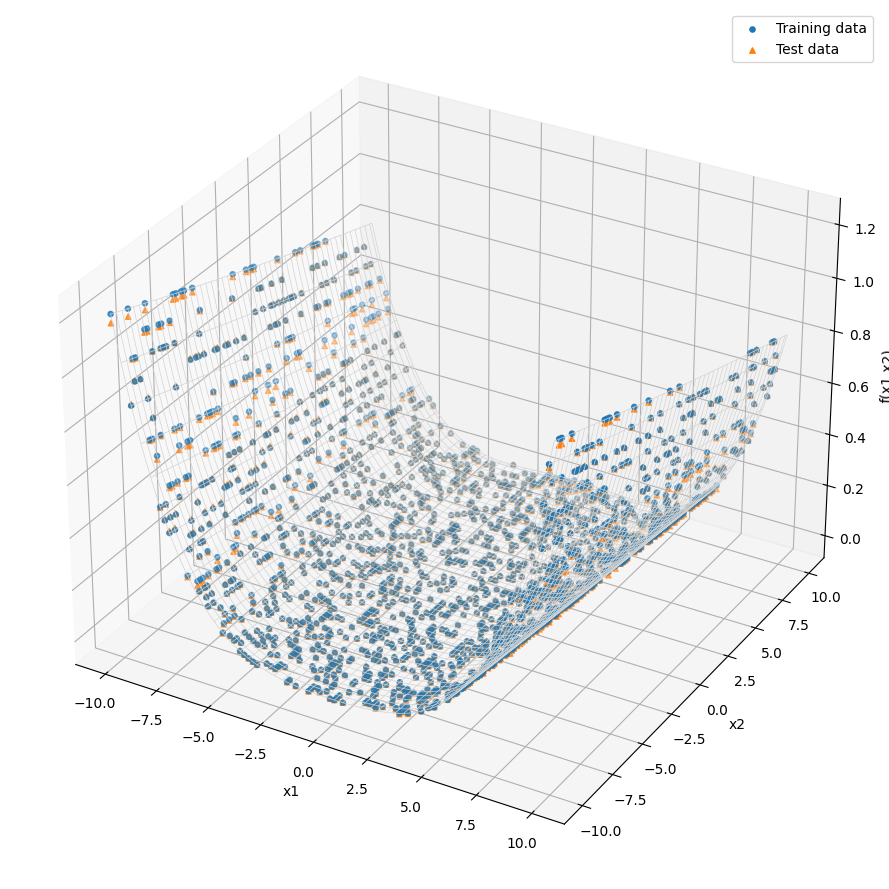

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, z, linewidths=0.5, color='lightgrey')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=14, color='C0', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], mlp.predict(x_test), s=15, marker='^', color='C1', label='Test data')

ax.set(
    xlabel='x1',
    ylabel='x2',
    zlabel='f(x1,x2)'
)

plt.legend()
plt.tight_layout()
plt.show()

#**1 B)** 

função: f(x1,x2)=(sen(πx1)/πx1)(sen(πx2)/πx2) ; -4π<=x1<=4π -4π<=x2<=4π

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [30]:

def function(x1, x2):
    return (np.sin(np.pi*x1)/(np.pi*x1)) * (np.sin(np.pi*x2)/(np.pi*x2))

# Dados de entrada que serão utilizados para treinamento
np.random.seed(0)
num_samples = 2000
x1_train = np.random.uniform(-4*np.pi, 4*np.pi, num_samples)
x2_train = np.random.uniform(-4*np.pi, 4*np.pi, num_samples)
x1_val = np.random.uniform(-4*np.pi, 4*np.pi, num_samples)
x2_val = np.random.uniform(-4*np.pi, 4*np.pi, num_samples)

y_train = function(x1_train, x2_train)
y_val = function(x1_val, x2_val)

# Arquitetura da rede neural
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(32, activation='relu')) # Adicionada uma arquitetura de camadas mais sofisticada
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

# Compilação e treinamento do modelo
model.compile(loss='mse', optimizer='adam')

#Treinando a rede neural
history = model.fit(
    np.column_stack((x1_train, x2_train)), y_train,
    validation_data=(np.column_stack((x1_val, x2_val)), y_val),
    epochs=100, batch_size=32, verbose=0
)

train_loss = model.evaluate(np.column_stack((x1_train, x2_train)), y_train)
val_loss = model.evaluate(np.column_stack((x1_val, x2_val)), y_val)
train2_loss = model.evaluate(np.column_stack((x1_train, x2_train)), y_train)



63/63 [==============================] - 0s 4ms/step - loss: 1.5049e-04


313/313 [==============================] - 1s 2ms/step


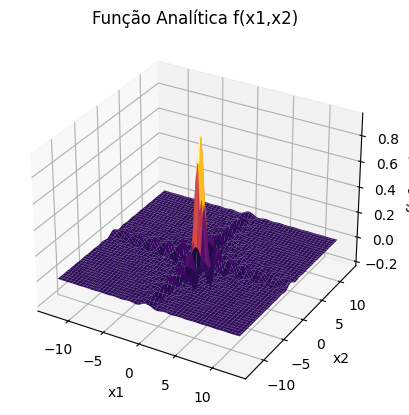

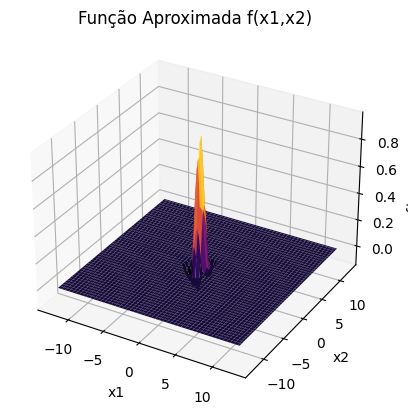

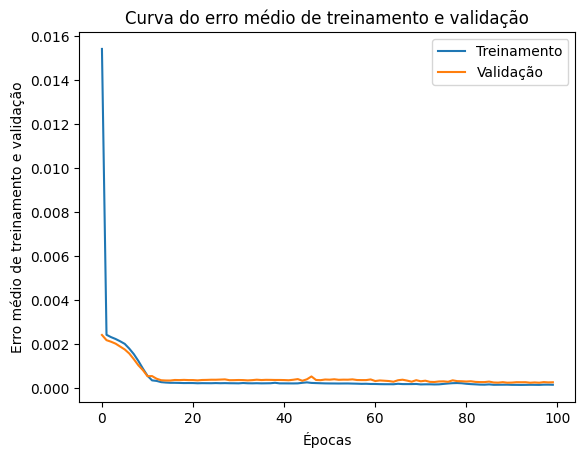

In [32]:
#Gerando pontos para desenhar os gráficos da função analítica e de curva aproximada
n_points = 100
x1 = np.linspace(-4*np.pi, 4*np.pi, n_points)
x2 = np.linspace(-4*np.pi, 4*np.pi, n_points)
X1, X2 = np.meshgrid(x1, x2)
Z_target = function(X1, X2)
Z_approx = model.predict(np.column_stack((X1.flatten(), X2.flatten()))).reshape(n_points, n_points)

# Curva da função analítica
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.plot_surface(X1, X2, Z_target, cmap='inferno')
ax1.set_title("Função Analítica f(x1,x2)")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_zlabel("f(x1, x2)")

# Curva da função aproximada pela rede neural
fig = plt.figure()
ax2 = fig.add_subplot(1, 1, 1, projection='3d')
ax2.plot_surface(X1, X2, Z_approx, cmap='inferno')
ax2.set_title("Função Aproximada f(x1,x2)")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_zlabel("f(x1, x2)")

# Curva do erro médio de treinamento
plt.figure()
plt.plot(history.history['loss'], label='Treinamento')
plt.legend()
plt.plot(history.history['val_loss'], label='Validação')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Erro médio de treinamento e validação')
plt.title('Curva do erro médio de treinamento e validação')
plt.show()
